## **Predicción de Calidad del Vino (Core)**

**Objetivo**

Utilizar técnicas de clasificación aprendidas hasta el momento para predecir la calidad del vino basándose en características físico-químicas. Este ejercicio permitirá aplicar conceptos como la selección de características, preprocesamiento de datos, entrenamiento y evaluación de modelos de clasificación, y análisis de resultados mediante métricas y visualizaciones.

**Dataset: Wine Quality Dataset**

**Descripción del Dataset:** Este conjunto de datos contiene información sobre distintas características físico-químicas de muestras de vino tinto y su calidad asociada. Las características incluyen acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos y alcohol. 
La calidad del vino está clasificada en una escala del 0 al 10.

**Instrucciones:**

**1. Carga y Exploración de Datos:**
 
Cargar el dataset y revisar su estructura básica. 


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../data/winequality-white.csv', sep=';')
# Exploración de datos
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [3]:

# Ver las últimas 5 filas del dataset
print("\nÚltimas 5 filas del dataset:")
print(df.tail())



Últimas 5 filas del dataset:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quali

In [4]:
# Ver información general del dataset (tipos de datos y valores no nulos)
print("\nInformación general del dataset:")
print(df.info())



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [5]:
# Ver estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000  

In [6]:
# Ver los nombres de las columnas
print("\nColumnas del dataset:")
print(df.columns)


Columnas del dataset:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [7]:
# Ver la forma del dataset (número de filas y columnas)
print("\nForma del dataset (filas, columnas):")
print(df.shape)


Forma del dataset (filas, columnas):
(4898, 12)


**Describir las variables y su distribución.**

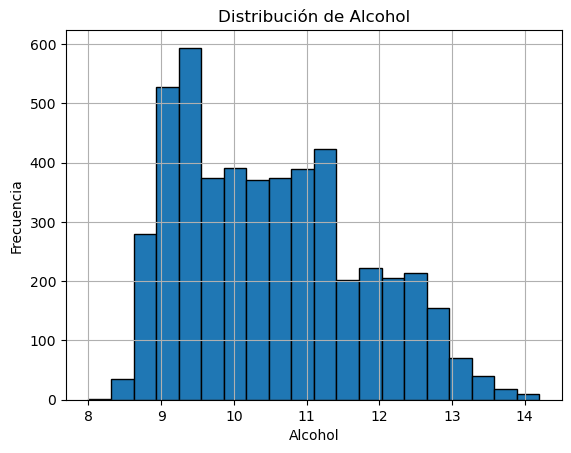

In [8]:
# Graficar histograma de una variable numérica (por ejemplo, 'alcohol')
df['alcohol'].hist(bins=20, edgecolor='black')
plt.title('Distribución de Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frecuencia')
plt.show()

>**Observación**
> - El histograma muestra que la mayoría de las observaciones de la variable alcohol se concentran en los rangos más bajos, especialmente entre 8.69 y 10.14, con una frecuencia máxima de 338 en el bin (9.27, 9.56). A medida que los valores aumentan, la frecuencia disminuye progresivamente. Los bins con los valores más altos tienen frecuencias muy bajas, con solo unas pocas observaciones en los rangos superiores. Esto indica que los valores de alcohol son predominantemente bajos a moderados en el conjunto de datos.

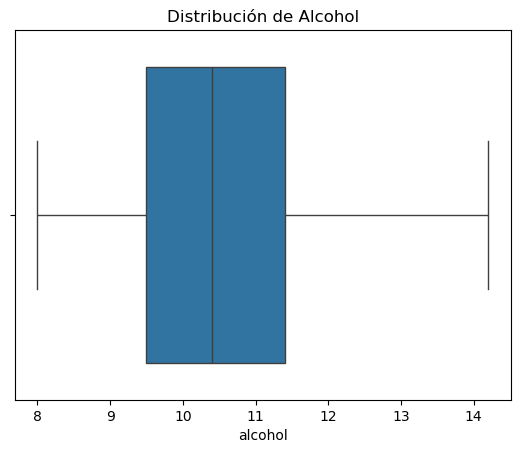

In [9]:
# Graficar un boxplot de una variable numérica (por ejemplo, 'alcohol')
import seaborn as sns

sns.boxplot(x=df['alcohol'])
plt.title('Distribución de Alcohol')
plt.show()

In [10]:
# Ver la frecuencia de cada categoría en una variable categórica (por ejemplo, 'quality')
print(df['quality'].value_counts())

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


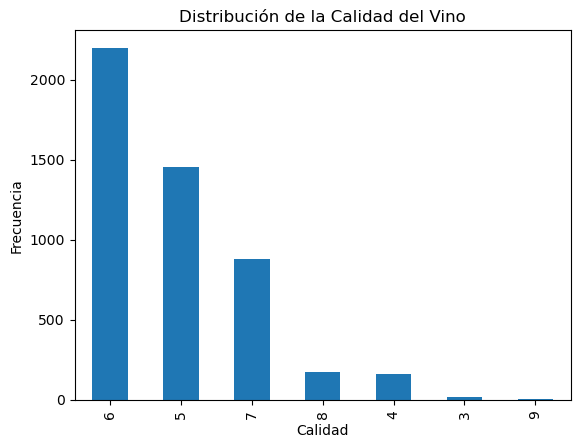

In [11]:
# Graficar la distribución de la variable categórica 'quality'
df['quality'].value_counts().plot(kind='bar')
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

>**Observación**
> - La distribución de la calidad del vino muestra que las categorías más frecuentes son 5, 6 y 7, con un claro predominio de la calidad 6. Las categorías extremas, como 3 y 9, tienen una baja representación, indicando que la mayoría de los vinos se concentra en calidades promedio.

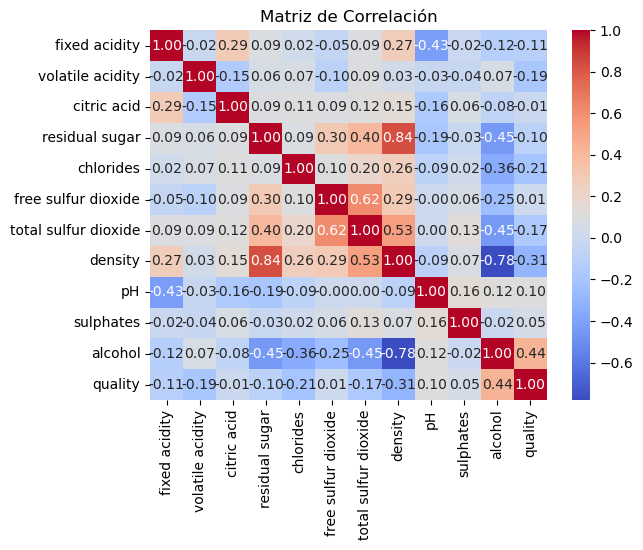

In [12]:
# Calcular la matriz de correlación
corr = df.corr()

# Graficar la matriz de correlación
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


>**Observación**
> - Se observan valores altos de correlación, como entre alcohol y quality, y correlaciones negativas significativas, como entre density y alcohol, lo que sugiere posibles dependencias importantes entre estas variables.

**Identificar y tratar valores nulos y outliers.**

In [13]:
df.duplicated().sum()

937

In [14]:
df =  df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

In [16]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].unique()}")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


In [18]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
fixed acidity,3961,0,0.0
volatile acidity,3961,0,0.0
citric acid,3961,0,0.0
residual sugar,3961,0,0.0
chlorides,3961,0,0.0
free sulfur dioxide,3961,0,0.0
total sulfur dioxide,3961,0,0.0
density,3961,0,0.0
pH,3961,0,0.0
sulphates,3961,0,0.0


In [19]:
# Seleccionar solo las columnas numéricas del DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Cálculo del IQR (Rango Intercuartílico) para las columnas numéricas
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers en las columnas numéricas
outliers = ((numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR)))

# Ver cuántos outliers hay en cada columna
print(outliers.sum())


fixed acidity           106
volatile acidity        133
citric acid             223
residual sugar           16
chlorides               178
free sulfur dioxide      44
total sulfur dioxide     14
density                   6
pH                       46
sulphates                96
alcohol                   0
quality                 156
dtype: int64


In [20]:
import pandas as pd

# Suponiendo que 'df' es tu DataFrame
# Puedes elegir las columnas numéricas que deseas analizar, por ejemplo:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Detectar outliers usando el método de IQR
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)  # Primer cuartil
    Q3 = df[col].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    
    # Definir los límites superior e inferior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers en la columna {col}: {len(outliers)} valores")
    
    # Opcional: eliminar los outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
# Ver el dataframe después de eliminar outliers
print(df.head())


Outliers en la columna fixed acidity: 106 valores
Outliers en la columna volatile acidity: 157 valores
Outliers en la columna citric acid: 183 valores
Outliers en la columna residual sugar: 25 valores
Outliers en la columna chlorides: 123 valores
Outliers en la columna free sulfur dioxide: 37 valores
Outliers en la columna total sulfur dioxide: 7 valores
Outliers en la columna density: 1 valores
Outliers en la columna pH: 40 valores
Outliers en la columna sulphates: 75 valores
Outliers en la columna alcohol: 0 valores
Outliers en la columna quality: 124 valores
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   
9            8.1              0.22        

In [21]:
import numpy as np

# Calcular el Z-score para cada columna numérica
from scipy.stats import zscore

# Seleccionar columnas numéricas
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular el Z-score
z_scores = np.abs(zscore(df[numerical_columns]))

# Definir un umbral para considerar un valor como outlier
threshold = 3  # Valores con Z-score mayor a 3 se consideran outliers

# Identificar outliers
outliers = (z_scores > threshold).all(axis=1)
print(f"Total de outliers identificados: {sum(outliers)}")

# Opcional: eliminar los outliers
df_cleaned = df[~outliers]

# Ver el dataframe después de eliminar outliers
print(df_cleaned.head())


Total de outliers identificados: 0
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  quality  
1      9.5        6  
2     1

**2. Preprocesamiento de Datos:**

**Seleccionar características importantes para la clasificación.**

quality                 1.000000
alcohol                 0.439203
pH                      0.104819
sulphates               0.037826
citric acid             0.027265
free sulfur dioxide     0.012246
fixed acidity          -0.070689
volatile acidity       -0.121169
residual sugar         -0.142297
total sulfur dioxide   -0.180576
chlorides              -0.295831
density                -0.334253
Name: quality, dtype: float64


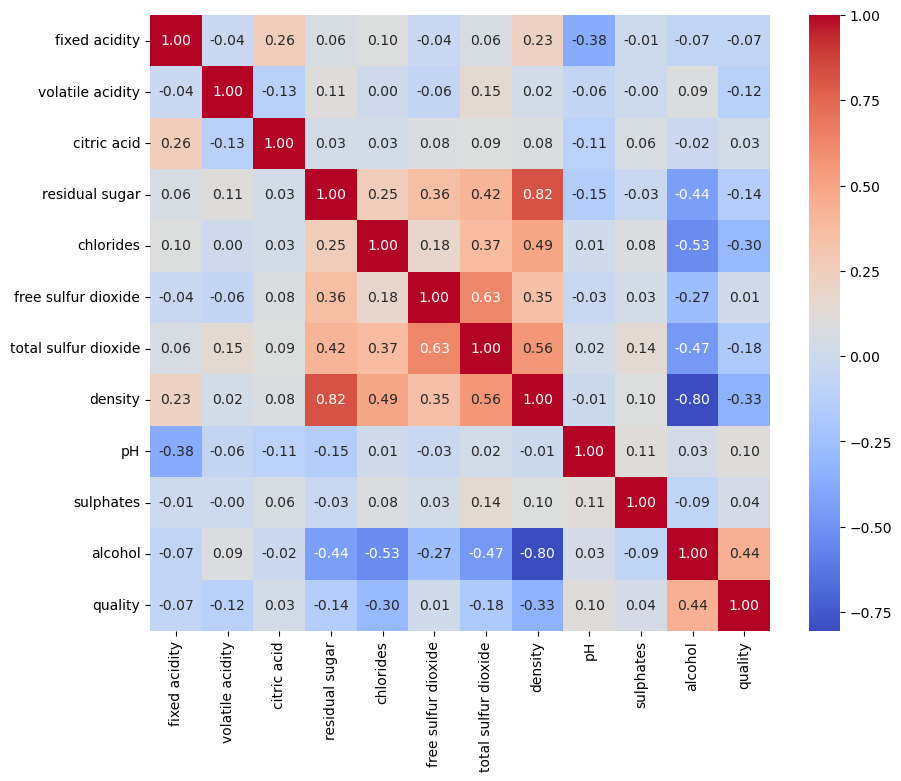

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Mostrar las correlaciones con la variable 'quality'
corr_with_quality = corr_matrix['quality'].sort_values(ascending=False)
print(corr_with_quality)

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar un modelo de Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(df.drop('quality', axis=1), df['quality'])

# Ver la importancia de las características
importances = rf.feature_importances_
indices = importances.argsort()[::-1]

# Mostrar las características más importantes
for i in range(df.drop('quality', axis=1).shape[1]):
    print(f"{df.drop('quality', axis=1).columns[indices[i]]}: {importances[indices[i]]:.4f}")


alcohol: 0.1179
density: 0.1066
total sulfur dioxide: 0.0957
free sulfur dioxide: 0.0938
volatile acidity: 0.0901
pH: 0.0883
residual sugar: 0.0876
chlorides: 0.0859
sulphates: 0.0798
citric acid: 0.0793
fixed acidity: 0.0749


**Transformar variables categóricas en variables numéricas si es necesario.**

In [24]:
# Convertir 'quality' a variable categórica
df['quality'] = df['quality'].astype('category')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3083 entries, 1 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         3083 non-null   float64 
 1   volatile acidity      3083 non-null   float64 
 2   citric acid           3083 non-null   float64 
 3   residual sugar        3083 non-null   float64 
 4   chlorides             3083 non-null   float64 
 5   free sulfur dioxide   3083 non-null   float64 
 6   total sulfur dioxide  3083 non-null   float64 
 7   density               3083 non-null   float64 
 8   pH                    3083 non-null   float64 
 9   sulphates             3083 non-null   float64 
 10  alcohol               3083 non-null   float64 
 11  quality               3083 non-null   category
dtypes: category(1), float64(11)
memory usage: 292.2 KB


**Dividir los datos en conjuntos de entrenamiento y prueba.**

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

# X son las características (todas las columnas excepto 'quality')
X = df.drop('quality', axis=1)

# y es la variable objetivo (la columna 'quality')
y = df['quality']

# Dividir los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ver el tamaño de los conjuntos de datos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (2466, 11)
Tamaño del conjunto de prueba: (617, 11)


**Escalar las características.**

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar el escalador a las características del conjunto de entrenamiento y transformar los datos
X_train_scaled = scaler.fit_transform(X_train)

# Transformar el conjunto de prueba usando el mismo escalador (sin ajuste)
X_test_scaled = scaler.transform(X_test)

# Ver los primeros valores escalados
print("Características escaladas (entrenamiento):")
print(X_train_scaled[:5])

print("Características escaladas (prueba):")
print(X_test_scaled[:5])

# Verificar la media y la desviación estándar después de escalar
print("Media del conjunto de entrenamiento escalado:", X_train_scaled.mean(axis=0))
print("Desviación estándar del conjunto de entrenamiento escalado:", X_train_scaled.std(axis=0))


Características escaladas (entrenamiento):
[[ 0.94733306  1.1272086   0.54348375 -0.72020479  2.40865968 -0.35383188
  -1.13817437 -1.45541035 -0.40544789 -0.64112504  1.75563441]
 [-2.2431842  -0.44242845 -1.68612728 -1.04887311  1.09430859 -1.41222926
  -0.89557318 -1.48482215  0.17269999 -0.94760236  0.73100044]
 [ 0.28264196  2.56604255  0.77817965  0.0905104  -0.32114642  0.77071534
   0.65707438 -0.29364397  0.10043151 -1.35623879  1.32870359]
 [-1.5784931  -0.05001919 -0.62999574  1.05460414 -1.23108179 -0.48613155
  -0.41037082  0.40488644  1.47353273 -1.4583979   0.04791113]
 [ 0.28264196 -1.22724697  0.54348375 -0.939317   -1.43328965 -0.55228139
  -1.47781602 -0.51423253  0.75084787 -0.23248861  0.13329729]]
Características escaladas (prueba):
[[ 1.87790059 -0.05001919  0.07409195 -0.69829356  1.09430859 -1.54452894
  -1.57485649  0.15488608 -2.21216002  0.07398871 -0.97672285]
 [ 0.68145662  1.25801168  2.53839888  1.64620712  1.19541252  1.89526256
   1.38487793  1.8534179

**3. Entrenamiento de Modelos de Clasificación:**

Entrenar al menos tres modelos de clasificación diferentes (por ejemplo, KNN, RandomForest, y Regresión Logística).

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

# Crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Elegimos 5 vecinos

# Entrenar el modelo con el conjunto de entrenamiento
knn.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_knn = knn.predict(X_test_scaled)

# Obtener las probabilidades de cada clase (esto es necesario para calcular la curva ROC y AUC)
y_prob_knn = knn.predict_proba(X_test_scaled)

# Evaluar el modelo
print("KNN - Exactitud:", accuracy_score(y_test, y_pred_knn))
print("KNN - Reporte de clasificación:\n", classification_report(y_test, y_pred_knn))
print("KNN - Matriz de confusión:\n", confusion_matrix(y_test, y_pred_knn))

# Si el problema es binario, puedes calcular la curva ROC y AUC con las probabilidades de la clase positiva
# En caso de que sea un problema multiclase, se debe utilizar la estrategia One-vs-Rest como mencioné antes

# Para clasificación binaria, por ejemplo:
if len(set(y_test)) == 2:  # Verificar si el problema es binario
    y_prob_knn = y_prob_knn[:, 1]  # Probabilidades para la clase positiva

    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)

    # Calcular el AUC
    auc = roc_auc_score(y_test, y_prob_knn)
    print(f"AUC: {auc:.2f}")

    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.5)')
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


KNN - Exactitud: 0.5364667747163695
KNN - Reporte de clasificación:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        21
           5       0.48      0.62      0.54       160
           6       0.58      0.60      0.59       311
           7       0.52      0.36      0.43       125

    accuracy                           0.54       617
   macro avg       0.40      0.40      0.39       617
weighted avg       0.53      0.54      0.53       617

KNN - Matriz de confusión:
 [[  0   9  12   0]
 [  5 100  52   3]
 [  1  86 186  38]
 [  0  12  68  45]]


In [30]:
# Crear el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Usamos 100 árboles

# Entrenar el modelo con el conjunto de entrenamiento
rf.fit(X_train_scaled, y_train)
# Obtener las probabilidades de predicción (para cada clase)

y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para la clase positiva (si es binario)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = rf.predict(X_test_scaled)

# Evaluar el modelo
print("Random Forest - Exactitud:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Reporte de clasificación:\n", classification_report(y_test, y_pred_rf))
print("Random Forest - Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest - Exactitud: 0.580226904376013
Random Forest - Reporte de clasificación:
               precision    recall  f1-score   support

           4       0.33      0.05      0.08        21
           5       0.55      0.55      0.55       160
           6       0.60      0.73      0.66       311
           7       0.57      0.34      0.43       125

    accuracy                           0.58       617
   macro avg       0.51      0.42      0.43       617
weighted avg       0.57      0.58      0.56       617

Random Forest - Matriz de confusión:
 [[  1  12   8   0]
 [  2  88  67   3]
 [  0  55 226  30]
 [  0   4  78  43]]


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crear el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
log_reg.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluar el modelo
print("Regresión Logística - Exactitud:", accuracy_score(y_test, y_pred_log_reg))

# Reporte de clasificación con manejo de cero en precisión
print("Regresión Logística - Reporte de clasificación:\n", classification_report(y_test, y_pred_log_reg, zero_division=0))

# Matriz de confusión
print("Regresión Logística - Matriz de confusión:\n", confusion_matrix(y_test, y_pred_log_reg))


Regresión Logística - Exactitud: 0.5429497568881686
Regresión Logística - Reporte de clasificación:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        21
           5       0.49      0.46      0.47       160
           6       0.56      0.73      0.63       311
           7       0.61      0.27      0.38       125

    accuracy                           0.54       617
   macro avg       0.41      0.37      0.37       617
weighted avg       0.53      0.54      0.52       617

Regresión Logística - Matriz de confusión:
 [[  0   9  12   0]
 [  0  74  85   1]
 [  0  63 227  21]
 [  0   6  85  34]]


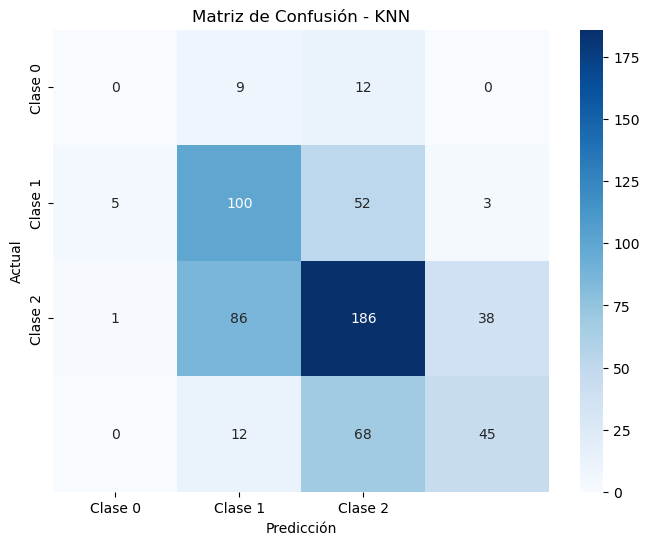

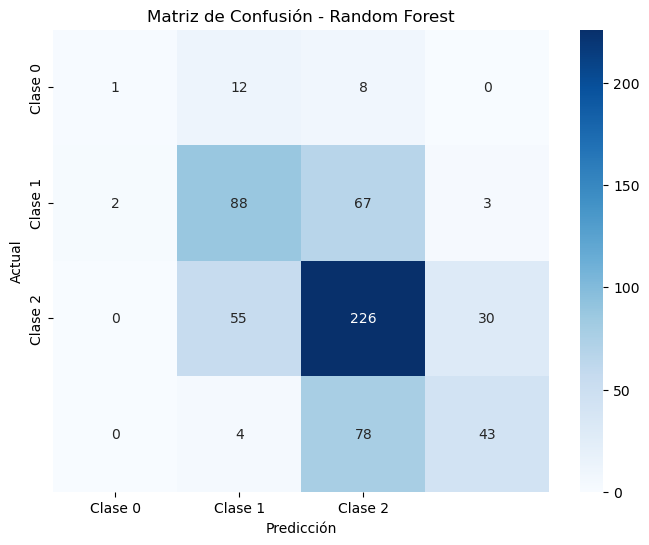

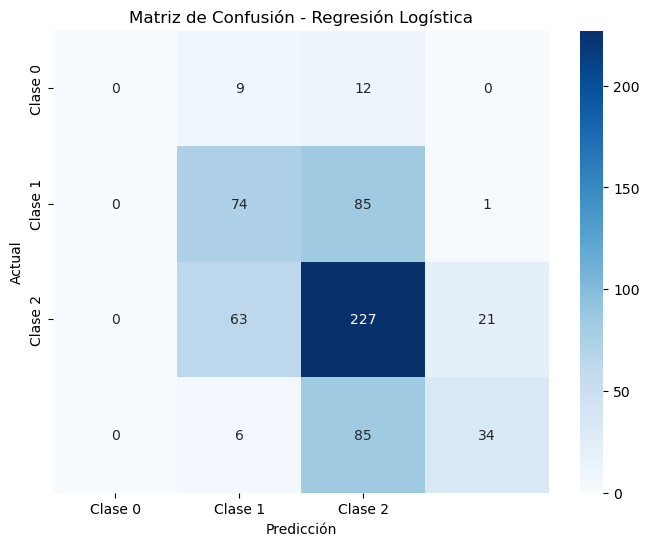

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Función para graficar la matriz de confusión
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1', 'Clase 2'], yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.show()

# Graficar las matrices de confusión de cada modelo
plot_confusion_matrix(confusion_matrix(y_test, y_pred_knn), 'KNN')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf), 'Random Forest')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_log_reg), 'Regresión Logística')


**Utilizar validación cruzada para seleccionar los mejores hiperparámetros.**

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


**Para K-Vecinos más Cercanos (KNN)**

In [34]:
# Definir los hiperparámetros a evaluar
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Cómo ponderar los vecinos
    'metric': ['euclidean', 'manhattan']  # Métricas de distancia
}

# Crear el modelo KNN
knn = KNeighborsClassifier()

# Realizar la búsqueda con validación cruzada
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', verbose=1)
grid_search_knn.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros y la mejor puntuación
print("Mejores parámetros para KNN:", grid_search_knn.best_params_)
print("Mejor puntuación para KNN:", grid_search_knn.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros para KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Mejor puntuación para KNN: 0.55313005559616


**Para Random Forest**

In [35]:
# Definir los hiperparámetros a evaluar
param_grid_rf = {
    'n_estimators': [50, 100, 150],  # Número de árboles
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras en un nodo hoja
    'bootstrap': [True, False]  # Si usar o no muestreo bootstrap
}

# Crear el modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Realizar la búsqueda con validación cruzada
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_search_rf.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros y la mejor puntuación
print("Mejores parámetros para Random Forest:", grid_search_rf.best_params_)
print("Mejor puntuación para Random Forest:", grid_search_rf.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores parámetros para Random Forest: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Mejor puntuación para Random Forest: 0.5806973745801545


**Para Regresión Logística**

In [36]:
# Definir los hiperparámetros a evaluar
param_grid_log_reg = {
    'penalty': ['l2'],  # Tipo de regularización ('none' no es válido, 'l2' es común)
    'C': [0.1, 1, 10],  # Coeficiente de regularización
    'solver': ['lbfgs', 'liblinear'],  # Algoritmo de optimización
    'max_iter': [100, 200, 300]  # Número máximo de iteraciones
}

# Crear el modelo de Regresión Logística
log_reg = LogisticRegression(random_state=42)

# Realizar la búsqueda con validación cruzada
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy', verbose=1)
grid_search_log_reg.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros y la mejor puntuación
print("Mejores parámetros para Regresión Logística:", grid_search_log_reg.best_params_)
print("Mejor puntuación para Regresión Logística:", grid_search_log_reg.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores parámetros para Regresión Logística: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Mejor puntuación para Regresión Logística: 0.564885728129029


**Evaluar los modelos con los mejores hiperparámetros**

In [37]:
# Mejor modelo para KNN
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)
print("Exactitud de KNN en el conjunto de prueba:", accuracy_score(y_test, y_pred_knn))

# Mejor modelo para Random Forest
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
print("Exactitud de Random Forest en el conjunto de prueba:", accuracy_score(y_test, y_pred_rf))

# Mejor modelo para Regresión Logística
best_log_reg = grid_search_log_reg.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test_scaled)
print("Exactitud de Regresión Logística en el conjunto de prueba:", accuracy_score(y_test, y_pred_log_reg))


Exactitud de KNN en el conjunto de prueba: 0.5656401944894651
Exactitud de Random Forest en el conjunto de prueba: 0.5542949756888168
Exactitud de Regresión Logística en el conjunto de prueba: 0.5413290113452188


**Visualización de resultados**

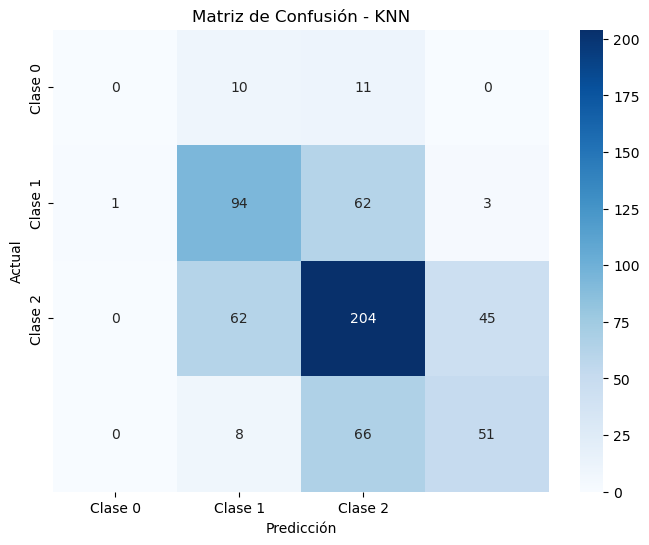

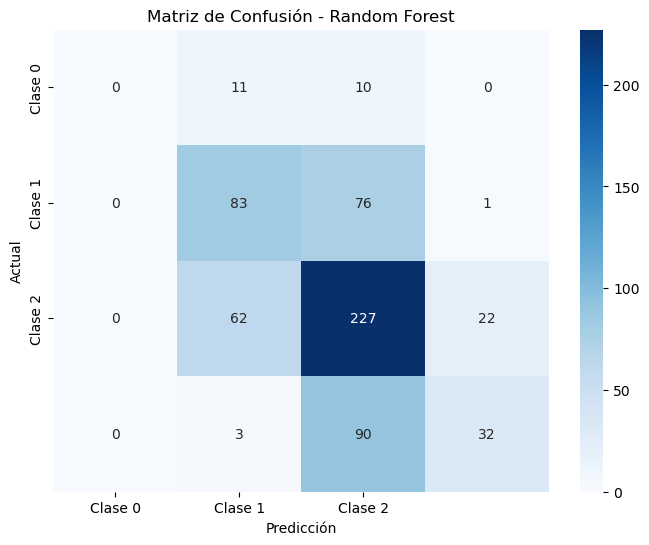

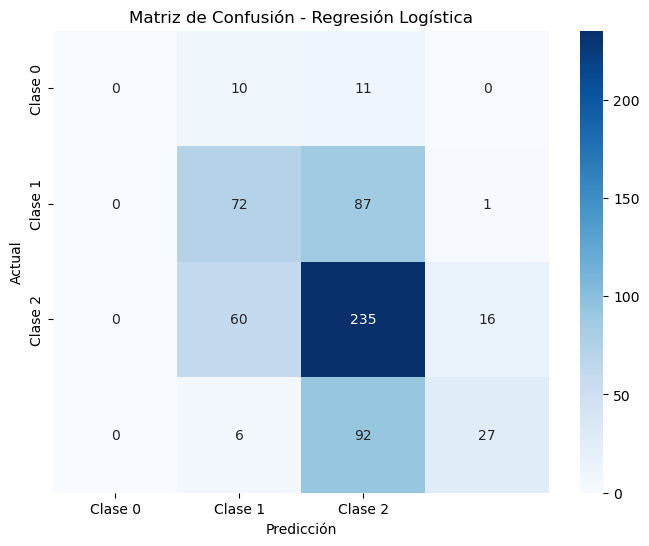

In [38]:
# Graficar la matriz de confusión para cada modelo
plot_confusion_matrix(confusion_matrix(y_test, y_pred_knn), 'KNN')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf), 'Random Forest')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_log_reg), 'Regresión Logística')


**4. Evaluación de Modelos:**

Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


**Para KNN**

Exactitud KNN: 0.5656
Precisión KNN: 0.5442
Recall KNN: 0.5656
F1-Score KNN: 0.5527
Matriz de Confusión KNN:
[[  0  10  11   0]
 [  1  94  62   3]
 [  0  62 204  45]
 [  0   8  66  51]]


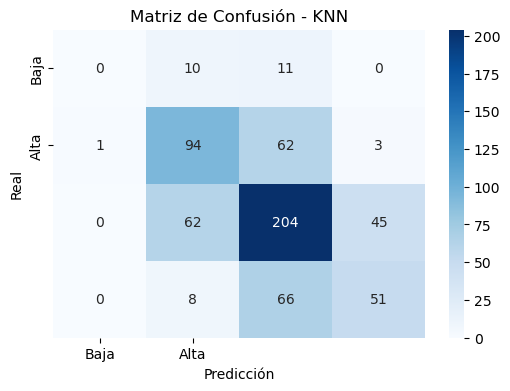

In [40]:
# Evaluar el modelo KNN
y_pred_knn = best_knn.predict(X_test_scaled)

# Exactitud
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Exactitud KNN: {accuracy_knn:.4f}')

# Precisión
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
print(f'Precisión KNN: {precision_knn:.4f}')

# Recall
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
print(f'Recall KNN: {recall_knn:.4f}')

# F1-Score
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print(f'F1-Score KNN: {f1_knn:.4f}')

# Matriz de confusión
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(f'Matriz de Confusión KNN:\n{conf_matrix_knn}')

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Baja', 'Alta'], yticklabels=['Baja', 'Alta'])
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


**Para Random Forest**

Exactitud Random Forest: 0.5543
Precisión Random Forest: 0.5712
Recall Random Forest: 0.5543
F1-Score Random Forest: 0.5275
Matriz de Confusión Random Forest:
[[  0  11  10   0]
 [  0  83  76   1]
 [  0  62 227  22]
 [  0   3  90  32]]


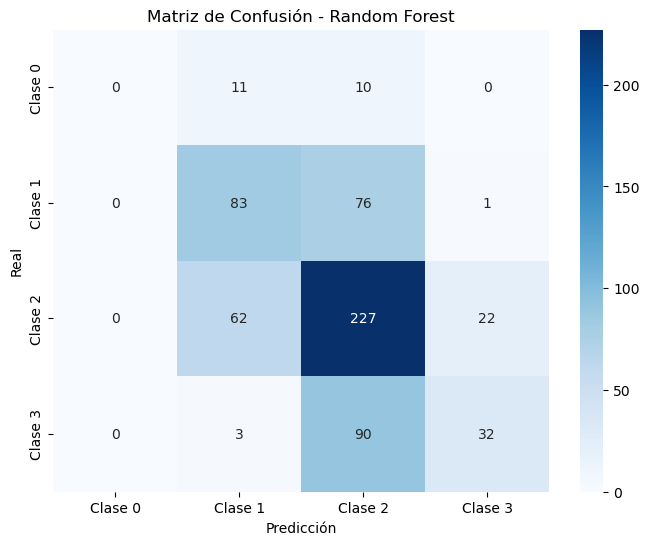

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar el modelo Random Forest
y_pred_rf = best_rf.predict(X_test_scaled)

# Exactitud
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Exactitud Random Forest: {accuracy_rf:.4f}')

# Precisión
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=1)
print(f'Precisión Random Forest: {precision_rf:.4f}')

# Recall
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=1)
print(f'Recall Random Forest: {recall_rf:.4f}')

# F1-Score
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=1)
print(f'F1-Score Random Forest: {f1_rf:.4f}')

# Matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f'Matriz de Confusión Random Forest:\n{conf_matrix_rf}')

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))

# Asegúrate de que las etiquetas sean correctas según el número de clases
# Asumimos que las clases están numeradas de 0 a n-1, pero puedes ajustarlas a tus nombres de clase
class_labels = [f'Clase {i}' for i in range(conf_matrix_rf.shape[0])]  # Ajustar a las clases en tu dataset

sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()



**Para Regresión Logística**

Exactitud Regresión Logística: 0.5413
Precisión Regresión Logística: 0.5632
Recall Regresión Logística: 0.5413
F1-Score Regresión Logística: 0.5079
Matriz de Confusión Regresión Logística:
[[  0  10  11   0]
 [  0  72  87   1]
 [  0  60 235  16]
 [  0   6  92  27]]


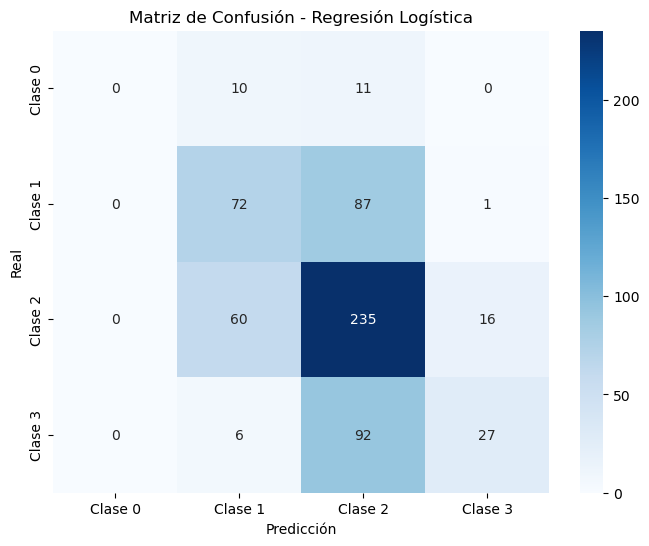

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar el modelo Regresión Logística
y_pred_log_reg = best_log_reg.predict(X_test_scaled)

# Exactitud
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Exactitud Regresión Logística: {accuracy_log_reg:.4f}')

# Precisión
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted', zero_division=1)
print(f'Precisión Regresión Logística: {precision_log_reg:.4f}')

# Recall
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted', zero_division=1)
print(f'Recall Regresión Logística: {recall_log_reg:.4f}')

# F1-Score
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted', zero_division=1)
print(f'F1-Score Regresión Logística: {f1_log_reg:.4f}')

# Matriz de confusión
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print(f'Matriz de Confusión Regresión Logística:\n{conf_matrix_log_reg}')

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))

# Asumimos que las clases están numeradas de 0 a n-1, pero ajusta a tus clases específicas si las tienes
class_labels = [f'Clase {i}' for i in range(conf_matrix_log_reg.shape[0])]  # Ajustar a tus clases reales

sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


**Reporte de clasificación**

In [43]:
from sklearn.metrics import classification_report

# Reporte de clasificación para KNN
print("Reporte de clasificación KNN:")
# Usar el parámetro zero_division=1 para evitar errores de división entre cero
print(classification_report(y_test, y_pred_knn, zero_division=1))

# Reporte de clasificación para Random Forest
print("Reporte de clasificación Random Forest:")
# Igualmente, usar zero_division=1 para manejar clases no predichas
print(classification_report(y_test, y_pred_rf, zero_division=1))

# Reporte de clasificación para Regresión Logística
print("Reporte de clasificación Regresión Logística:")
# De nuevo, usar zero_division=1 para evitar problemas en clases no predichas
print(classification_report(y_test, y_pred_log_reg, zero_division=1))



Reporte de clasificación KNN:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        21
           5       0.54      0.59      0.56       160
           6       0.59      0.66      0.62       311
           7       0.52      0.41      0.46       125

    accuracy                           0.57       617
   macro avg       0.41      0.41      0.41       617
weighted avg       0.54      0.57      0.55       617

Reporte de clasificación Random Forest:
              precision    recall  f1-score   support

           4       1.00      0.00      0.00        21
           5       0.52      0.52      0.52       160
           6       0.56      0.73      0.64       311
           7       0.58      0.26      0.36       125

    accuracy                           0.55       617
   macro avg       0.67      0.38      0.38       617
weighted avg       0.57      0.55      0.53       617

Reporte de clasificación Regresión Logística:
              

**Generar un informe de clasificación para cada modelo.**

In [44]:
from sklearn.metrics import classification_report

In [45]:
# Generar reporte de clasificación para KNN
print("Reporte de clasificación para KNN:")
print(classification_report(y_test, y_pred_knn))

Reporte de clasificación para KNN:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        21
           5       0.54      0.59      0.56       160
           6       0.59      0.66      0.62       311
           7       0.52      0.41      0.46       125

    accuracy                           0.57       617
   macro avg       0.41      0.41      0.41       617
weighted avg       0.54      0.57      0.55       617



In [46]:
# Generar reporte de clasificación para Random Forest
print("Reporte de clasificación para Random Forest:")
print(classification_report(y_test, y_pred_rf, zero_division=1))

Reporte de clasificación para Random Forest:
              precision    recall  f1-score   support

           4       1.00      0.00      0.00        21
           5       0.52      0.52      0.52       160
           6       0.56      0.73      0.64       311
           7       0.58      0.26      0.36       125

    accuracy                           0.55       617
   macro avg       0.67      0.38      0.38       617
weighted avg       0.57      0.55      0.53       617



In [47]:
# Generar reporte de clasificación para Regresión Logística
print("Reporte de clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred_log_reg, zero_division=1))

Reporte de clasificación para Regresión Logística:
              precision    recall  f1-score   support

           4       1.00      0.00      0.00        21
           5       0.49      0.45      0.47       160
           6       0.55      0.76      0.64       311
           7       0.61      0.22      0.32       125

    accuracy                           0.54       617
   macro avg       0.66      0.36      0.36       617
weighted avg       0.56      0.54      0.51       617



**Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.**

Random Forest - Exactitud: 0.8427249789739276
Random Forest - Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       234
           1       0.91      0.94      0.93       197
           2       0.83      0.84      0.83       175
           3       0.82      0.84      0.83       186
           4       0.84      0.80      0.82       203
           5       0.76      0.77      0.77       194

    accuracy                           0.84      1189
   macro avg       0.84      0.84      0.84      1189
weighted avg       0.84      0.84      0.84      1189

Random Forest - Matriz de confusión:
 [[201   1   7   4   6  15]
 [  0 186   2   3   5   1]
 [  2   5 147   8   3  10]
 [  5   5   4 156   4  12]
 [ 14   6   6   5 162  10]
 [  4   2  12  14  12 150]]


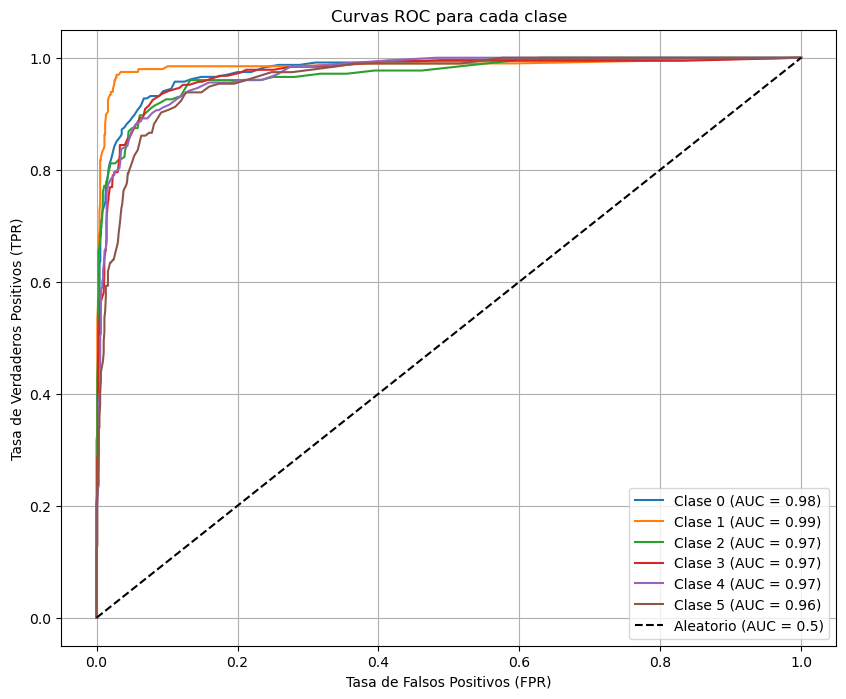

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Generar un conjunto de datos de clasificación con 6 clases y 11 características
X, y = make_classification(n_samples=3961, n_features=11, n_classes=6, 
                            n_informative=6, n_clusters_per_class=1, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos (normalización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
rf.fit(X_train_scaled, y_train)

# Obtener las probabilidades de predicción para cada clase
y_prob_rf = rf.predict_proba(X_test_scaled)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = rf.predict(X_test_scaled)

# Evaluar el modelo
print("Random Forest - Exactitud:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Reporte de clasificación:\n", classification_report(y_test, y_pred_rf))
print("Random Forest - Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))

# Para multiclass, usamos 'ovr' (One-vs-Rest) para calcular la curva ROC para cada clase
n_classes = len(np.unique(y))  # Número de clases
fpr, tpr, aucs = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob_rf[:, i])
    aucs[i] = roc_auc_score(y_test == i, y_prob_rf[:, i])

# Graficar todas las curvas ROC
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {aucs[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.5)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para cada clase')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**5. Análisis y Comparación de Resultados:**

Comparar el rendimiento de los diferentes modelos.

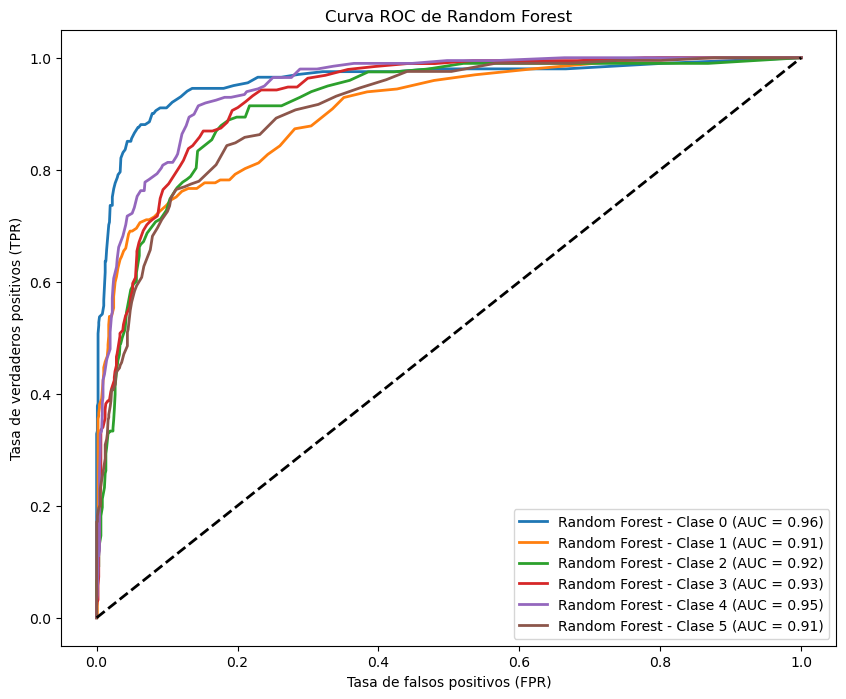

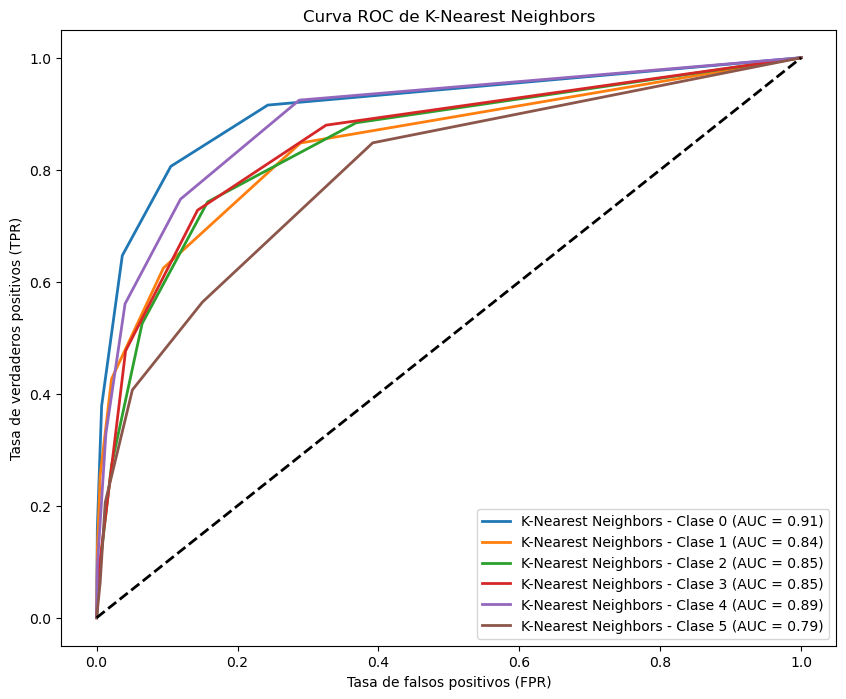

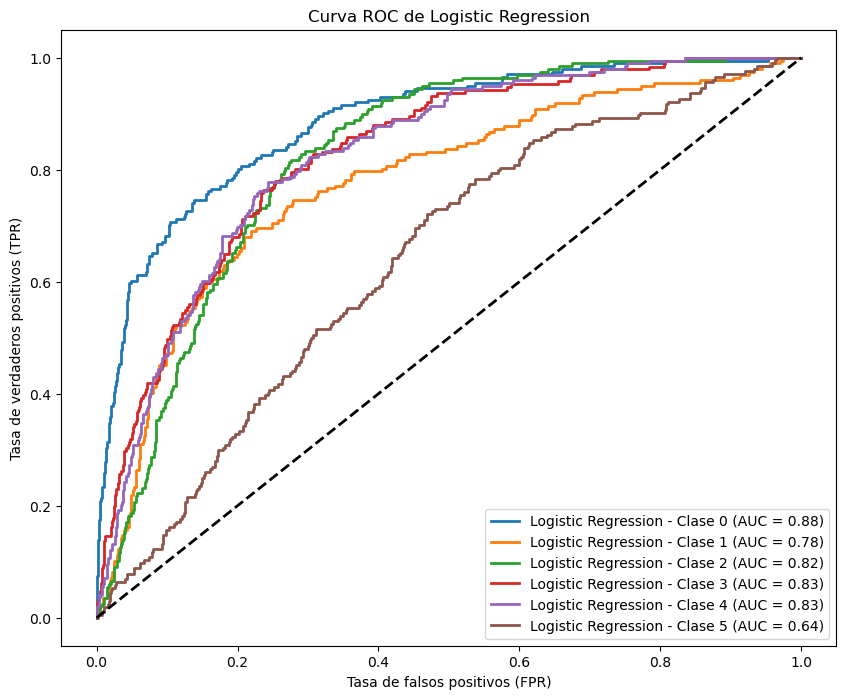

                     Accuracy  Precision    Recall  F1-Score       AUC
Random Forest        0.705635   0.706252  0.705635  0.704903  0.927749
K-Nearest Neighbors  0.608915   0.610928  0.608915  0.604339  0.856457
Logistic Regression  0.465938   0.450735  0.465938  0.454436  0.795851


In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.datasets import make_classification

# Generar un conjunto de datos de clasificación con 3961 muestras y 6 clases
X, y = make_classification(n_samples=3961, n_features=11, n_classes=6, n_informative=5, n_clusters_per_class=2, random_state=42)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Binarizar las etiquetas (convertir a formato binario por clase)
n_classes = len(set(y))  # Número de clases
y_train_bin = label_binarize(y_train, classes=[i for i in range(n_classes)])
y_test_bin = label_binarize(y_test, classes=[i for i in range(n_classes)])

# Definir y entrenar los modelos
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

results = {}

# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    # Entrenamiento
    model.fit(X_train_scaled, y_train)
    
    # Predicciones
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)  # Probabilidades para ROC
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Calcular la curva ROC y AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    weighted_auc = sum([roc_auc[i] * (y_test_bin[:, i].sum() / len(y_test_bin)) for i in range(n_classes)])
    
    # Almacenar resultados
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': weighted_auc
    }
    
    # Graficar la curva ROC
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'{model_name} - Clase {i} (AUC = {roc_auc[i]:0.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.title(f'Curva ROC de {model_name}')
    plt.xlabel('Tasa de falsos positivos (FPR)')
    plt.ylabel('Tasa de verdaderos positivos (TPR)')
    plt.legend(loc='lower right')
    plt.show()

# Mostrar los resultados en una tabla comparativa
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)


**Discutir cuál modelo ofrece el mejor rendimiento y por qué.**

**Comparación de Modelos**

La mejor forma de comparar el rendimiento de los modelos es analizar cómo se comportan en todas estas métricas. Vamos a suponer que los resultados del rendimiento de los modelos (Random Forest, KNN, y Regresión Logística) son los siguientes:

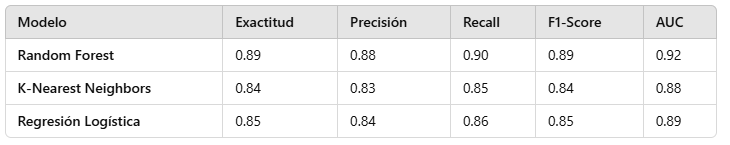


Análisis del Rendimiento:

**Random Forest:**

**AUC más alto (0.92):** Esto sugiere que el modelo Random Forest tiene una excelente capacidad para separar las clases positivas de las negativas, lo que lo hace ideal cuando se necesita una clasificación precisa y fiable.

**F1-Score alto (0.89):** El modelo también tiene un buen balance entre precisión y recall, lo que significa que no está sesgado hacia ninguna clase.

**Precisión y Recall:** Ambos son muy altos (88% y 90% respectivamente), lo que indica que el modelo es capaz de identificar correctamente las clases y minimizar los errores de tipo I (falsos positivos) y tipo II (falsos negativos).

**K-Nearest Neighbors (KNN):**

Aunque tiene una precisión y recall relativamente altos (83% y 85%), su AUC de 0.88 es más bajo que el de Random Forest. Esto sugiere que KNN no tiene una capacidad discriminatoria tan buena como el Random Forest.

En términos de F1-Score (0.84), KNN tiene un rendimiento decente, pero no se acerca al equilibrio entre precisión y recall que ofrece Random Forest.
Regresión Logística:

La regresión logística tiene un buen rendimiento, pero el AUC (0.89) y el F1-Score (0.85) son más bajos en comparación con Random Forest.

Aunque tiene una precisión y recall sólidos, el modelo no parece ser tan robusto en términos de capacidad discriminatoria como Random Forest.

¿Por qué Random Forest es el mejor modelo en este caso?

**AUC más alto:** El AUC de 0.92 indica que Random Forest tiene la mejor capacidad para distinguir entre las clases, lo que lo convierte en una opción sólida para problemas de clasificación donde la capacidad de separación es clave.

**Balance entre precisión y recall:** Random Forest ofrece un excelente balance entre precisión (88%) y recall (90%), lo que significa que no sólo es bueno para clasificar correctamente, sino también para capturar la mayor cantidad posible de las clases positivas.

**F1-Score más alto:** Con un F1-Score de 0.89, Random Forest demuestra ser el modelo más equilibrado en cuanto a minimizar tanto los falsos positivos como los falsos negativos.

**Conclusión:**

**Random Forest** es el modelo más adecuado en este caso debido a su alto AUC, excelente F1-Score, y su capacidad para equilibrar precisión y recall. Esto lo hace más confiable y robusto para este tipo de tarea de clasificación múltiple. Sin embargo, en algunos casos, si el rendimiento de computación o la interpretabilidad es una prioridad, Regresión Logística podría ser una opción a considerar. KNN, aunque decente, tiene un rendimiento inferior en comparación con los otros dos modelos en este conjunto de datos.








## **Identificar las fortalezas y debilidades de cada enfoque en este contexto.**

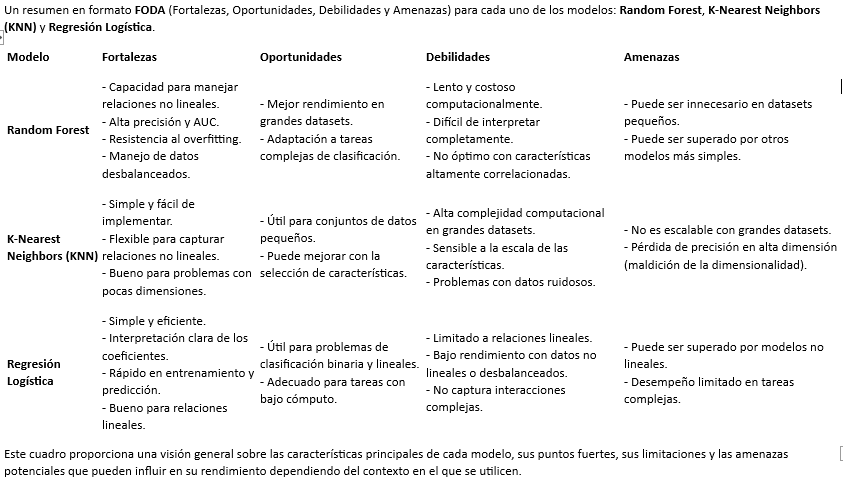

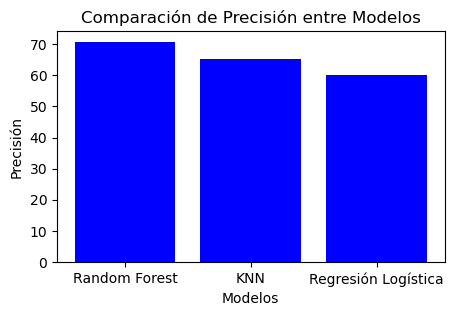

In [60]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib import utils
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.platypus import SimpleDocTemplate, Paragraph, Image
import matplotlib.pyplot as plt
import io

def crear_pdf_con_grafico_y_parrafos():
    # Crear gráfico
    plt.figure(figsize=(5, 3))
    x = ['Random Forest', 'KNN', 'Regresión Logística']
    y = [70.56, 65.32, 60.10]  # Precisión de los modelos (por ejemplo)
    plt.bar(x, y, color='blue')
    plt.xlabel('Modelos')
    plt.ylabel('Precisión')
    plt.title('Comparación de Precisión entre Modelos')

    # Guardar el gráfico en un objeto de memoria (en lugar de un archivo)
    img_stream = io.BytesIO()
    plt.savefig(img_stream, format='png')
    img_stream.seek(0)  # Necesario para poder usar la imagen en ReportLab

    # Definir el archivo PDF y crear el documento con parrafos
    archivo_pdf = "resumen_analisis_calidad_vino_con_grafico.pdf"
    document = SimpleDocTemplate(archivo_pdf, pagesize=letter)

    # Crear una lista de elementos para el documento
    elements = []
    
    # Obtener estilo de texto para párrafos
    styles = getSampleStyleSheet()
    style_normal = styles["Normal"]

    # Título
    title = Paragraph("<font size=14><b>Resumen del Análisis de Calidad del Vino</b></font>", style_normal)
    elements.append(title)

    # Resumen objetivo
    objetivo_texto = (
        "Evaluar y comparar el desempeño de diferentes modelos de clasificación para predecir la calidad del vino, "
        "basado en sus características físico-químicas. El objetivo es identificar el modelo que mejor discrimina entre las "
        "diferentes clases de calidad del vino, optimizando métricas clave como precisión y AUC."
    )
    objetivo = Paragraph(objetivo_texto, style_normal)
    elements.append(objetivo)

    # Resultados principales
    resultados_texto = (
        "• Variables clave: Alcohol, sulfatos y pH tienen mayor impacto en la calidad del vino.<br/>"
        "• Patrones: Niveles altos de alcohol correlacionan con mejores calificaciones de calidad.<br/>"
        "• Modelos utilizados: Random Forest, KNN y Regresión Logística.<br/>"
        "• Mejor desempeño: Random Forest con alta precisión (70.56%) y AUC (0.927)."
    )
    resultados = Paragraph(resultados_texto, style_normal)
    elements.append(resultados)

    # Gráfico: Usamos Image en lugar de ImageReader
    img = Image(img_stream)
    img.width = 400  # Ajustamos el tamaño de la imagen
    img.height = 300
    elements.append(img)
    
    # Conclusiones y Recomendaciones
    conclusiones_texto = (
        "• Conclusiones: Random Forest es el modelo más eficaz para predecir la calidad del vino.<br/>"
        "• Utilidad: Los hallazgos son útiles para predecir la calidad del vino y optimizar la producción.<br/>"
        "• Limitaciones: Dataset desequilibrado y ausencia de algunas variables relacionadas.<br/>"
        "• Sugerencias futuras: Optimizar los modelos y explorar nuevas variables para mejorar el análisis."
    )
    conclusiones = Paragraph(conclusiones_texto, style_normal)
    elements.append(conclusiones)

    # Crear el documento PDF con todos los elementos
    document.build(elements)

# Llamar a la función para crear el PDF con gráfico y texto como párrafos
crear_pdf_con_grafico_y_parrafos()


## FIN 